Studi Kasus:
Anda diminta untuk mengklasifikasikan wajah pada dataset *Labeled Face in Wild* (LFW), dengan kriteria:

**Spesifikasi Objek:**
1. Setiap label dari dataset LFW harus memuat minimal 10 gambar (5 point)
2. Format gambar yang digunakan adalah RGB (5 point)
3. Lakukan pra-pemrosesan data jika diperlukan (opsional)(ekstra 10 point)
4. Gunakan histogram untuk setiap channel gambar (wajib) (35 point)
5. Gunakan algoritma SVM sebagai model dasar (wajib) (35 point)
6. Metrik akurasi, dan laporan klasifikasi untuk melihat kinerja model (wajib) (20 point)

**Tantangan**
Setelah menyelesaikan objektif diatas, anda boleh melakukan:
1. Menggunakan fitur lain selain histogram (ekstra 20 point)
2. Menggunakan model selain svm (ekstra 10 point)
3. Evaluasi dengan metrik lain atau report dengan *confusion matrix* (ekstra 10 point)

In [1]:
# load and import library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import cv2
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [4]:
# Load dataset
faces = fetch_lfw_people(min_faces_per_person=50, color=True)

print(f'Total Label:{len(faces.target_names)}')
print(f'Dimensi data: {faces.images.shape}')
print(f'Dimension flatten images:{faces.data.shape}')
print(f'image dimension:{faces.images[1].shape}')

Total Label:12
Dimensi data: (1560, 62, 47, 3)
Dimension flatten images:(1560, 8742)
image dimension:(62, 47, 3)


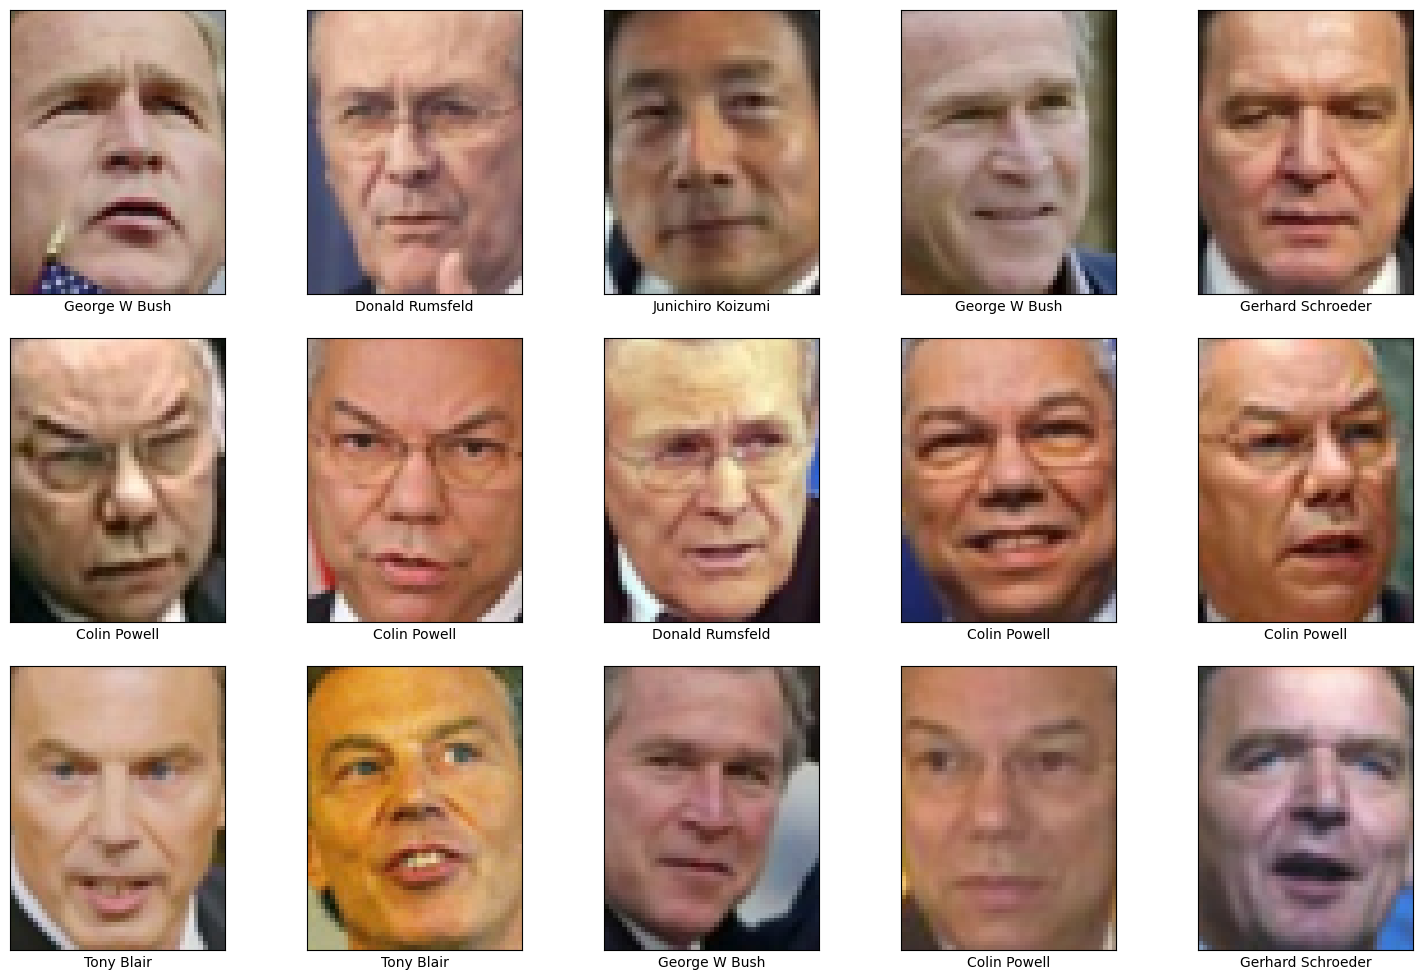

In [8]:
# Showing random image
def show15_random_images(faces) :
    random_label = [np.random.randint(0,len(faces.images)) for x in range(15)]
    fig, axes = plt.subplots(3,5, figsize=(15,10))
    fig.tight_layout()
    for i, axi in enumerate(axes.flat):
        axi.imshow(faces.images[random_label[i]], cmap='bone')
        axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[random_label[i]]])
        
        
show15_random_images(faces)

In [10]:
# from sklearn.datasets import fetch_lfw_people

# Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=10, resize=0.5)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print(f"Loaded {X.shape[0]} images of {n_classes} classes.")

Loaded 4324 images of 158 classes.


In [11]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)